In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 9.1MB/s 
     |████████████████████████████████| 460kB 53.3MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import numpy as np
import pandas as pd
import re
from konlpy.tag import Okt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
Train = pd.read_csv('/content/drive/MyDrive/datasets/news_train.csv')
Test = pd.read_csv('/content/drive/MyDrive/datasets/news_test.csv')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [ ]:
print(len(Train))
print(len(Test))

118745
142565


In [ ]:
# 결측치 확인
Train.isnull().sum()

n_id       0
date       0
title      0
content    0
ord        0
info       0
dtype: int64

In [ ]:
Test.isnull().sum()

n_id       0
date       0
title      0
content    0
ord        0
id         0
dtype: int64

In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118745 entries, 0 to 118744
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   n_id     118745 non-null  object
 1   date     118745 non-null  int64 
 2   title    118745 non-null  object
 3   content  118745 non-null  object
 4   ord      118745 non-null  int64 
 5   info     118745 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.4+ MB


In [ ]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142565 entries, 0 to 142564
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   n_id     142565 non-null  object
 1   date     142565 non-null  int64 
 2   title    142565 non-null  object
 3   content  142565 non-null  object
 4   ord      142565 non-null  int64 
 5   id       142565 non-null  object
dtypes: int64(2), object(4)
memory usage: 6.5+ MB


In [ ]:
train_lenght = Train['content'].apply(len)
train_lenght.head()

0    42
1    37
2    33
3    32
4    20
Name: content, dtype: int64

Text(0, 0.5, 'Number of content')

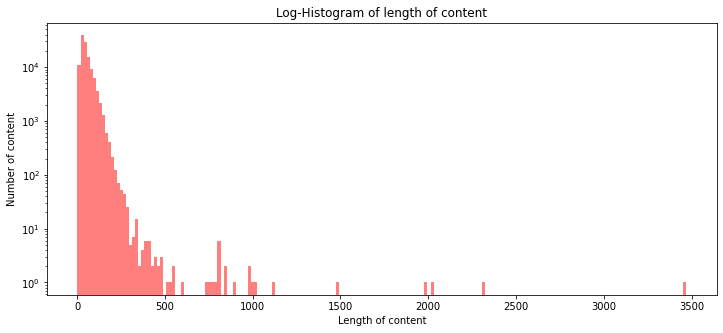

In [ ]:
plt.figure(figsize=(12,5))

plt.hist(train_lenght, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of content')
plt.xlabel('Length of content')
plt.ylabel('Number of content')

In [ ]:
print('content 길이 최댓값: {}'.format(np.max(train_lenght)))
print('content 길이 최솟값: {}'.format(np.min(train_lenght)))
print('content 길이 평균값: {:.2f}'.format(np.mean(train_lenght)))
print('content 길이 표준편차: {:.2f}'.format(np.std(train_lenght)))
print('content 길이 중간값: {}'.format(np.median(train_lenght)))
print('content 길이 제1사분위: {}'.format(np.percentile(train_lenght, 25)))
print('content 길이 제3사분위: {}'.format(np.percentile(train_lenght, 75)))

content 길이 최댓값: 3469
content 길이 최솟값: 2
content 길이 평균값: 51.33
content 길이 표준편차: 38.72
content 길이 중간값: 39.0
content 길이 제1사분위: 29.0
content 길이 제3사분위: 64.0


In [ ]:
q1 = np.percentile(train_lenght,25)      # 1사분위수
q2 = np.percentile(train_lenght,50)      # 2사분위수
q3 = np.percentile(train_lenght,75)      # 3사분위수
max = np.percentile(train_lenght,100)  # 최대값
iqr = q3-q1
uf = q3 + 1.5 * iqr

Text(0.85, 116, '116')

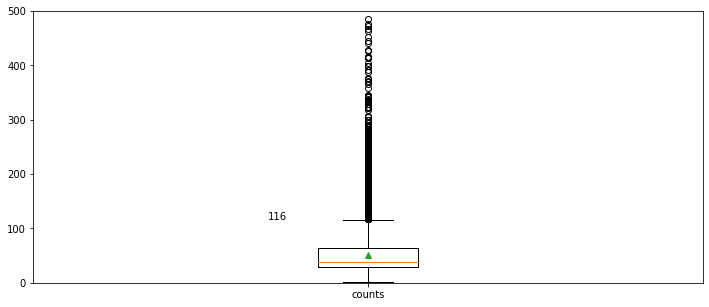

In [ ]:
plt.figure(figsize=(12,5))

plt.boxplot(train_lenght, labels=['counts'],showmeans=True)
plt.ylim([0,500])
plt.text(0.85, train_lenght[train_lenght<uf].max(), train_lenght[train_lenght<uf].max())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


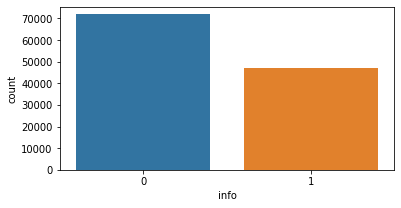

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(Train['info'])

In [ ]:
train_word_counts = Train['content'].apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of contents')

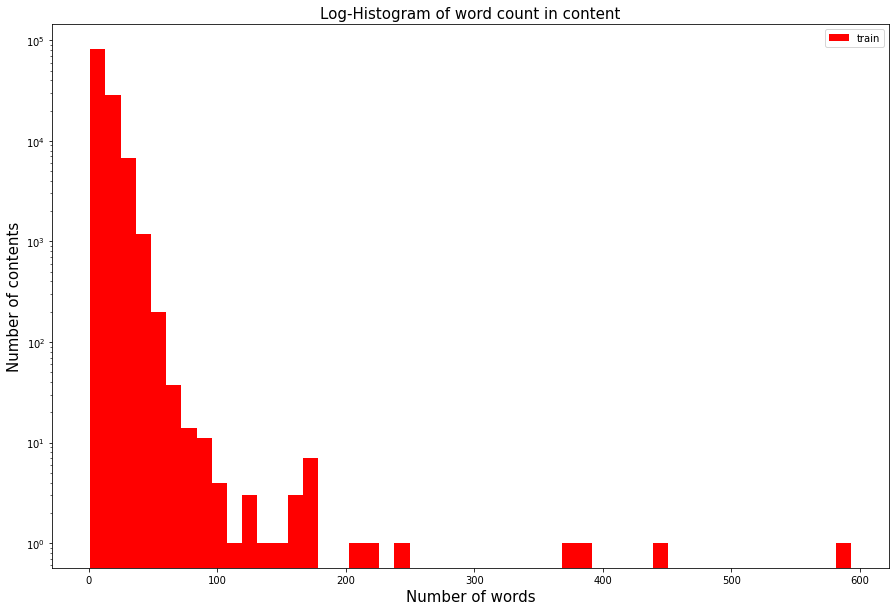

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in content', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of contents', fontsize=15)

{'boxes': [<matplotlib.lines.Line2D at 0x7f1d27427c88>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1d274316d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d274394e0>],
 'means': [<matplotlib.lines.Line2D at 0x7f1d27439198>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d27431dd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1d27427f98>,
  <matplotlib.lines.Line2D at 0x7f1d27431358>]}

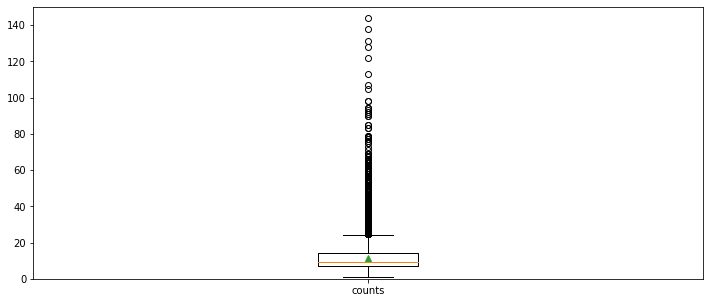

In [ ]:
plt.figure(figsize=(12,5))

plt.ylim([0,150])
plt.boxplot(train_word_counts, labels=['counts'],showmeans=True)

In [ ]:
avglist = []
avg = 1
for i in range(1, len(Train)):
  if Train['ord'][i] == 1:
    avglist.append(avg)
    avg = 1
  else:
    avg += 1

print('고유 title 개수 : ', Train['n_id'].nunique())
print('한 title 당 content 최소 개수 : ', min(avglist))
print('한 title 당 content 최대 개수 : ', max(avglist))
print('한 title 당 content 평균 개수 : ', round(np.mean(avglist), 1))

In [ ]:
#title과 content를 구분자 공백으로 합친 뒤 content열에 삽입
Train["content"] = Train["title"] + " " + Train["content"]
#사용하지 않는 열 n_id / title / date / ord 삭제
df = Train.drop(['n_id','title','date','ord'], axis=1)
#중복 행 제거
df = df.drop_duplicates()

In [ ]:
print('중복 제거 전 개수: ', len(Train))
print('중복 제거 후 개수: ', len(df))

중복 제거 전 개수:  118745
중복 제거 후 개수:  70982


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


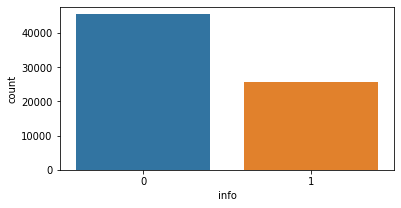

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(df['info'])